In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = '/content/drive/MyDrive/'

In [ ]:
dataset_A = url + 'Dataset A.zip'
with ZipFile(dataset_A, 'r') as zip:
  zip.extractall()

In [ ]:
PATH = '/content/'
data_labels = pd.read_csv(PATH + 'training-a.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(19702, 2)


,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [ ]:
TRAIN_PATH = url + 'Train7'
os.mkdir(TRAIN_PATH)

def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH) 

processImages('training-a')

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  19702


# **Base Parameters**

In [ ]:
batch_size = 20
num_iters = 20000
input_dim = 28*28
num_hidden = 200
output_dim = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

20


In [ ]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:789
Test dataloader:197


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.softmax_1 = nn.Softmax(dim=0)
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.softmax_2 = nn.Softmax(dim=0)
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.softmax_3 = nn.Softmax(dim=0)
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.softmax_4 = nn.Softmax(dim=0)
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.softmax_5 = nn.Softmax(dim=0)
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.softmax_6 = nn.Softmax(dim=0)
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.softmax_1(out)
        
        out  = self.linear_2(out)
        out = self.softmax_2(out)
 
        out  = self.linear_3(out)
        out = self.softmax_3(out)
 
        out  = self.linear_4(out)
        out = self.softmax_4(out)
 
        out  = self.linear_5(out)
        out = self.softmax_5(out)
 
        out  = self.linear_6(out)
        out = self.softmax_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (softmax_1): Softmax(dim=0)
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (softmax_2): Softmax(dim=0)
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (softmax_3): Softmax(dim=0)
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (softmax_4): Softmax(dim=0)
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (softmax_5): Softmax(dim=0)
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (softmax_6): Softmax(dim=0)
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 500. Loss: 2.3340837955474854. Accuracy: 9.695431472081218
Epoch:  2
Iteration: 1000. Loss: 1.8574743270874023. Accuracy: 20.98984771573604
Iteration: 1500. Loss: 1.5801503658294678. Accuracy: 33.2994923857868
Epoch:  3
Iteration: 2000. Loss: 2.0158956050872803. Accuracy: 47.10659898477157
Epoch:  4
Iteration: 2500. Loss: 1.386828064918518. Accuracy: 54.87309644670051
Iteration: 3000. Loss: 0.7910823822021484. Accuracy: 59.84771573604061
Epoch:  5
Iteration: 3500. Loss: 0.7434183955192566. Accuracy: 61.878172588832484
Epoch:  6
Iteration: 4000. Loss: 1.0543262958526611. Accuracy: 65.22842639593908
Iteration: 4500. Loss: 0.9119561314582825. Accuracy: 66.6497461928934
Epoch:  7
Iteration: 5000. Loss: 0.7806845903396606. Accuracy: 68.2741116751269
Iteration: 5500. Loss: 0.7210918068885803. Accuracy: 70.20304568527919
Epoch:  8
Iteration: 6000. Loss: 1.0261938571929932. Accuracy: 72.05583756345177
Epoch:  9
Iteration: 6500. Loss: 0.843197226524353. Accuracy: 72.9949238

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Models/model_base1.pkl')

[2.3340837955474854, 1.8574743270874023, 1.5801503658294678, 2.0158956050872803, 1.386828064918518, 0.7910823822021484, 0.7434183955192566, 1.0543262958526611, 0.9119561314582825, 0.7806845903396606, 0.7210918068885803, 1.0261938571929932, 0.843197226524353, 0.879010796546936, 0.6454898118972778, 0.6319080591201782, 0.8258266448974609, 0.7715204358100891, 0.4760127663612366, 0.8740886449813843, 0.3987972140312195, 0.8014668226242065, 0.498401403427124, 1.392960786819458, 0.5282501578330994, 0.28105610609054565, 0.5957070589065552, 0.44182977080345154, 0.4333290457725525, 0.26987695693969727, 0.3580659031867981]


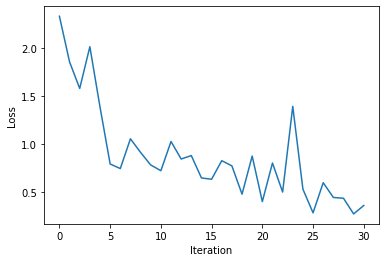

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()